The scope of this notebook is to explore the data contained within the afl_stats.csv file. As there are 18 teams in the AFL, I have chosen to focus my attention to only 1 of them: the Fremantle Dockers. 

Although I do not follow the AFL, someone I live with does. Being a Dockers fan himself, a lot of their matches would be on the TV and, more often than not, I would find myself following matches that I never intended to watch in the first place. In an attempt to learn more about the sport and the team itself, I decided to use the data provided to explore the Dockers further and build a better picture of their performace over the years. 

**HOUSEKEEPING**

Lets import the relevant packages that we will be using to complete the exploration and read the data. I'll begin by calling the dataframe containing the csv file df_afl. 

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime, date, timedelta

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_afl = pd.read_csv('afl_stats.csv')

In [3]:
df_afl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79948 entries, 0 to 79947
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     79948 non-null  int64  
 1   Round                    79948 non-null  object 
 2   Team                     79948 non-null  object 
 3   Score                    79948 non-null  int64  
 4   Margin                   79948 non-null  int64  
 5   WinLoss                  79948 non-null  object 
 6   Opposition               79948 non-null  object 
 7   Day                      79948 non-null  object 
 8   Date                     79948 non-null  object 
 9   Start Time               79948 non-null  object 
 10  Venue                    79948 non-null  object 
 11  Attendance               79948 non-null  object 
 12  Rainfall(mm)             78672 non-null  float64
 13  Player                   79948 non-null  object 
 14  DOB                   

In [4]:
df_afl.head(10)

,Year,Round,Team,Score,Margin,WinLoss,Opposition,Day,Date,Start Time,...,Brownlow Votes,Contested Possessions,Uncontested Possessions,Contested Marks,Marks Inside 50,One Percenters,Bounces,Goal Assists,% Played,Subs
0,2020,R1,Adelaide,71,-3,L,Sydney,Sat,21-Mar-2020,4:35 PM,...,0,8,7,1,1,0,0,1,79,NaN
1,2020,R1,Adelaide,71,-3,L,Sydney,Sat,21-Mar-2020,4:35 PM,...,0,4,4,0,0,3,0,0,87,NaN
2,2020,R1,Adelaide,71,-3,L,Sydney,Sat,21-Mar-2020,4:35 PM,...,0,12,8,0,0,0,0,0,77,NaN
3,2020,R1,Adelaide,71,-3,L,Sydney,Sat,21-Mar-2020,4:35 PM,...,0,4,13,0,0,0,0,1,73,NaN
4,2020,R1,Adelaide,71,-3,L,Sydney,Sat,21-Mar-2020,4:35 PM,...,0,4,2,1,0,1,2,0,85,NaN
5,2020,R1,Adelaide,71,-3,L,Sydney,Sat,21-Mar-2020,4:35 PM,...,0,3,5,1,1,1,0,1,84,NaN
6,2020,R1,Adelaide,71,-3,L,Sydney,Sat,21-Mar-2020,4:35 PM,...,0,6,4,1,0,2,0,0,90,NaN
7,2020,R1,Adelaide,71,-3,L,Sydney,Sat,21-Mar-2020,4:35 PM,...,0,1,5,0,0,2,0,0,75,NaN
8,2020,R1,Adelaide,71,-3,L,Sydney,Sat,21-Mar-2020,4:35 PM,...,0,3,6,0,1,2,0,0,81,NaN
9,2020,R1,Adelaide,71,-3,L,Sydney,Sat,21-Mar-2020,4:35 PM,...,0,5,3,2,0,4,0,0,95,NaN


In [5]:
df_afl.isnull().sum()

Year                           0
Round                          0
Team                           0
Score                          0
Margin                         0
WinLoss                        0
Opposition                     0
Day                            0
Date                           0
Start Time                     0
Venue                          0
Attendance                     0
Rainfall(mm)                1276
Player                         0
DOB                            0
Height                         0
Weight                         0
Position                       0
Disposals                      0
Kicks                          0
Marks                          0
Handballs                      0
Goals                          0
Behinds                        0
Hit Outs                       0
Tackles                        0
Rebounds                       0
Inside 50s                     0
Clearances                     0
Clangers                       0
Frees     

In [6]:
#Renaming the AFL teams with my own abbreviated version

d_team_map = {'Adelaide': 'ADL', 
'Port Adelaide': 'PDL',
'Carlton' : 'CAR',
'Collingwood' : 'COL', 
'Richmond': 'RCH',
'Brisbane Lions' : 'BRS', 
'Western Bulldogs' : 'WBL', 
'Gold Coast' : 'GCS', 
'Melbourne' : 'MLB',
'Geelong' : 'GEE', 
'Fremantle' : 'FRM', 
'Hawthorn' : 'HTN', 
'Sydney' : 'SYD', 
'St Kilda' : 'STK',
'Greater Western Sydney' : 'GWS', 
'North Melbourne' : 'NML',
'Essendon' : 'ESS',
'West Coast' : 'WCE'}

df_afl['Team'] = df_afl['Team'].map(d_team_map)
df_afl['Opposition'] = df_afl['Opposition'].map(d_team_map)

In [7]:
df_afl['Team'].unique()

array(['ADL', 'PDL', 'CAR', 'COL', 'RCH', 'BRS', 'WBL', 'GCS', 'MLB',
       'GEE', 'FRM', 'HTN', 'SYD', 'STK', 'GWS', 'NML', 'ESS', 'WCE'],
      dtype=object)

In [8]:
df_afl['Opposition'].unique()

array(['SYD', 'PDL', 'GCS', 'NML', 'HTN', 'GEE', 'STK', 'FRM', 'BRS',
       'WCE', 'MLB', 'GWS', 'RCH', 'ESS', 'CAR', 'COL', 'WBL', 'ADL'],
      dtype=object)

In [9]:
df_afl['WinLoss'].unique()

array(['L', 'W', 'D'], dtype=object)

*The 'WinLoss' colum contains data of type object. In order more efficiently analyse it, lets convert it into numerical data. In order to do so, we can apply the map method once again and change how a loss, win and draw - or L, W, and D, as they are respectivley represented in the data - are characterised.*

In [10]:
win_dmap = {'W':1 , 'L':0, 'D':0}
df_afl['WinLoss'] = df_afl['WinLoss'].map(win_dmap)

In [11]:
df_afl['WinLoss'].head()

0    0
1    0
2    0
3    0
4    0
Name: WinLoss, dtype: int64

In [12]:
df_afl['Date'].head(5)

0    21-Mar-2020
1    21-Mar-2020
2    21-Mar-2020
3    21-Mar-2020
4    21-Mar-2020
Name: Date, dtype: object

In [13]:
#Converting time stamp on Date column
df_afl['Date of Game'] = pd.to_datetime(df_afl['Date'])

In [14]:
df_afl['Date of Game'].head()

0   2020-03-21
1   2020-03-21
2   2020-03-21
3   2020-03-21
4   2020-03-21
Name: Date of Game, dtype: datetime64[ns]

**FOCUSING ON FREMANTLE DOCKERS**

Now that we have examined the data and made the appropriate changes in order to make it easier for us to perform some analysis, lets create a new dataframe which only considers the Fremantle Dockers (previously abbreviated to FRM). 

In [15]:
df_FRM = df_afl[(df_afl['Team'] == 'FRM')]

In [16]:
#Lets quickly check that we have copied data over for a single team (FRM) only.
df_FRM['Team'].nunique()

1

In [17]:
df_FRM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4444 entries, 14410 to 49697
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Year                     4444 non-null   int64         
 1   Round                    4444 non-null   object        
 2   Team                     4444 non-null   object        
 3   Score                    4444 non-null   int64         
 4   Margin                   4444 non-null   int64         
 5   WinLoss                  4444 non-null   int64         
 6   Opposition               4444 non-null   object        
 7   Day                      4444 non-null   object        
 8   Date                     4444 non-null   object        
 9   Start Time               4444 non-null   object        
 10  Venue                    4444 non-null   object        
 11  Attendance               4444 non-null   object        
 12  Rainfall(mm)             4378

**LETS BEGIN OUR ANALYSIS BY FOCUSING ON THE MAIN MEASURE OF SUCCESS: WINS**

In [18]:
#Lets begin our analysis by investigating the matches won by Fremantle over the period 2012-2020

df_FRM.groupby('Year')['WinLoss'].sum()

Year
2012    330
2013    396
2014    352
2015    396
2016     88
2017    176
2018    176
2019    198
2020    154
Name: WinLoss, dtype: int64

In [19]:
#Obviously FRM did not win 303 games in a single season. 
#It would seem that the sum of 'WinLoss' is counting every single player involved 
#So lets take a look at the number of players that took part in each match

df_FRM.groupby(['Year', 'Date of Game'])['Player'].nunique()

Year  Date of Game
2012  2012-03-31      22
      2012-04-07      22
      2012-04-14      22
      2012-04-20      22
      2012-04-27      22
                      ..
2020  2020-08-29      22
      2020-09-02      22
      2020-09-07      22
      2020-09-12      22
      2020-09-20      22
Name: Player, Length: 202, dtype: int64

In [20]:
#It appears that there are always 22 players involved. Lets confirm this by checking the number of 
#unique values for the unique players

df_FRM.groupby(['Year', 'Date of Game'])['Player'].nunique().nunique()

1

In [21]:
#as there are always 22 players, we can divide by 22 to find the amount of matches won each season

df_FRM.groupby('Year')['WinLoss'].sum().div(22)

Year
2012    15.0
2013    18.0
2014    16.0
2015    18.0
2016     4.0
2017     8.0
2018     8.0
2019     9.0
2020     7.0
Name: WinLoss, dtype: float64

In [22]:
#We can quickly compare the amount of matches won against the amount of matches played

df_FRM.groupby('Year').agg({'WinLoss': lambda x: sum(x)/22, 
                           'Date of Game':'nunique'}).rename(columns={'WinLoss':'Matches Won', 
                                                                     'Date of Game':'Matches Played'})

,Matches Won,Matches Played
Year,,
2012,15,24
2013,18,25
2014,16,24
2015,18,24
2016,4,22
2017,8,22
2018,8,22
2019,9,22
2020,7,17


In [23]:
#Lets compare the number of wins each season for Fremantle against their AFL opposition
#Carry the data over to a separate dataframe

df_afl_wins = pd.DataFrame(df_afl.groupby(['Team', 'Year'])['WinLoss'].sum().div(22))

In [24]:
df_afl_wins.head(10)

WinLoss
Team Year         
ADL  2012     18.0
     2013     10.0
     2014     11.0
     2015     14.0
     2016     17.0
     2017     17.0
     2018     12.0
     2019     10.0
     2020      3.0
BRS  2012     10.0

In [25]:
df_afl_wins.reset_index(inplace=True)

In [26]:
df_afl_wins.set_index('Team')

,Year,WinLoss
Team,,
ADL,2012,18.0
ADL,2013,10.0
ADL,2014,11.0
ADL,2015,14.0
ADL,2016,17.0
...,...,...
WCE,2016,16.0
WCE,2017,13.0
WCE,2018,19.0


In [27]:
df_afl_wins.rename(columns={'WinLoss':'Matches Won'}, inplace = True)

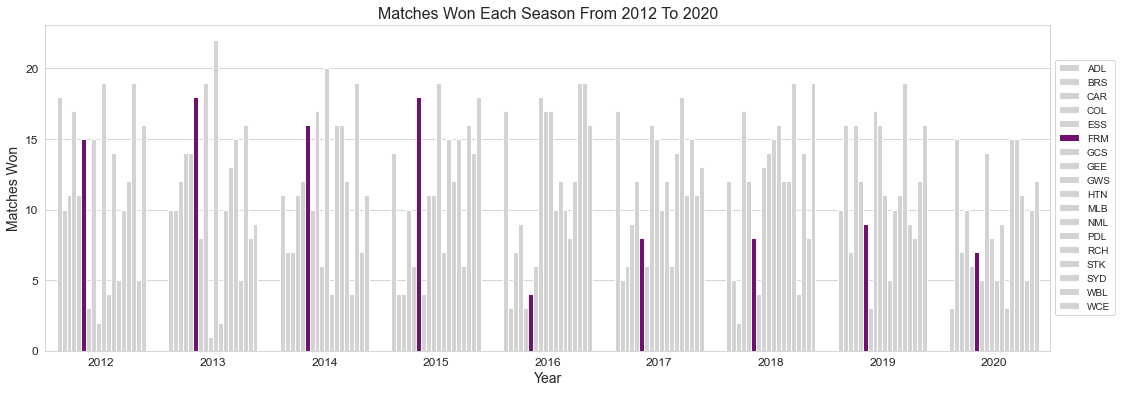

In [28]:
#Plot the data in order to quickly visualise how the amount of wins accumulated each season 
#by Fremantle compares to other teams in the AFL.

plt.figure(figsize = (18,6))

sns.barplot(data = df_afl_wins, x = 'Year', y = 'Matches Won', hue = 'Team', 
                  palette = {'ADL': 'lightgrey', 
                            'PDL' : 'lightgrey', 
                            'CAR' : 'lightgrey', 
                            'COL' : 'lightgrey', 
                            'RCH' : 'lightgrey',
                            'BRS' : 'lightgrey', 
                            'WBL' : 'lightgrey',
                            'GCS' : 'lightgrey', 
                            'MLB' : 'lightgrey',
                            'GEE' : 'lightgrey', 
                            'FRM' : 'purple', 
                            'HTN' : 'lightgrey', 
                            'SYD' : 'lightgrey', 
                            'STK' : 'lightgrey',
                            'GWS' : 'lightgrey', 
                            'NML' : 'lightgrey', 
                            'ESS' : 'lightgrey',
                            'WCE' : 'lightgrey' })


plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Matches Won', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Matches Won Each Season From 2012 To 2020', fontsize=16)
plt.show()

As we have the total number of matches played and the number of matches won each season, we can also plot Fremantle's win percentage for each season. 

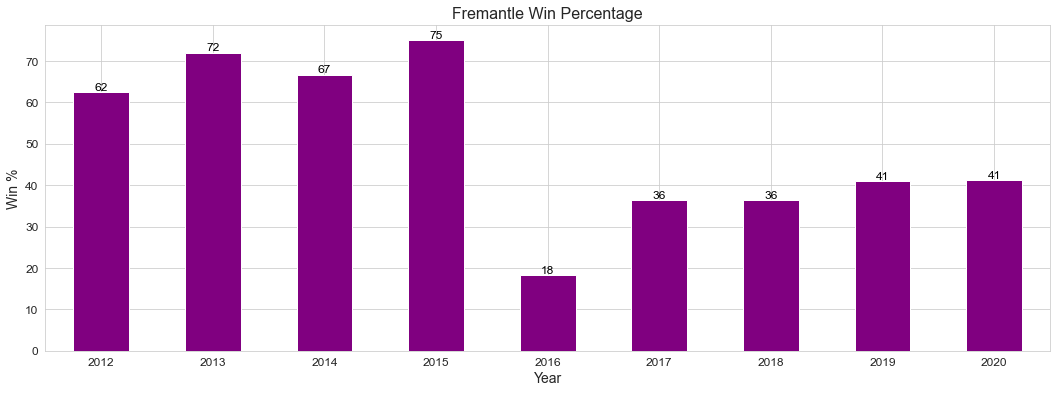

In [29]:
plt.figure(figsize=(18,6))

matches_won = df_FRM.groupby('Year')['WinLoss'].sum().div(22)
matches_played = df_FRM.groupby('Year')['Date'].nunique()

chart = matches_won.div(matches_played).mul(100).plot(kind='bar',color='purple')

for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0,5),
                 textcoords='offset points')

plt.xticks(rotation=0)
plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Win %', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Fremantle Win Percentage', fontsize=16)
plt.show()

What about the percentage of matches won by Fremantle against each AFL opposition? What does that look like?

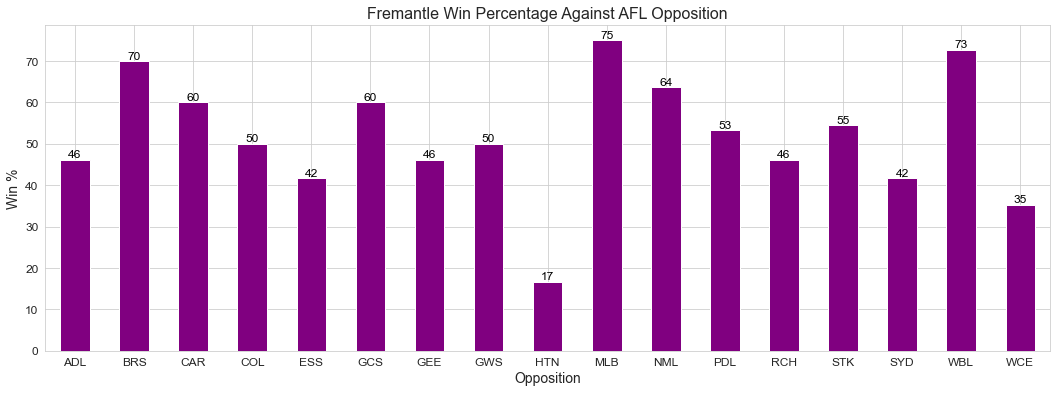

In [30]:
#Fremantle win percentage against each opposition from 2012-2020 inclusive
plt.figure(figsize=(18,6))

matches_won = df_FRM.groupby('Opposition')['WinLoss'].sum().div(22)
matches_against_opposition = df_FRM.groupby('Opposition')['Date'].nunique()

chart = matches_won.div(matches_against_opposition).mul(100).plot(kind='bar',color='purple')

for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0,5),
                 textcoords='offset points')

plt.title('Fremantle Win Percentage Against AFL Opposition', 
         fontsize=16)
plt.xticks(rotation=0)
plt.xlabel('Opposition', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Win %', fontsize=14)
plt.yticks(fontsize=12)

plt.show()

As shown above, Fremantle's best win percentage is against MLB (Melbourne). The Dockers boast a win percentage of 75% against the Demons but, in sharp contrast, have manged to overcome HTN (Hawthorn) only 17% of the time. This incredibly low win percentage is more than half of their next lowest score, held against their bitter rivals WCE (West Coast Eagles) at 35%, and shows the Hawks to be a true thorn in the Dockers' side.

**HOME AND AWAY**

In many sports, playing at home is seen as a great advantage. Lets see if this is true for Fremantle by analyising their winning record at home and away.

In this case, I refer to 'playing at home' as playing in your home stadium regardless to whether a team is scheduled as the home or away team. As FRM and WCE share a stadium, although FRM may be regarded as the 'away' team due to how the fixture list is designed, given that when these two teams meet FRM is playing in its home stadium, the fixture is counted as being a home match for FRM. 

In [31]:
#Venue column shows where the match was played. We can thus look at performance home and away. 
#Lets create an array where 1 represents a home match and 0 an away match.

Home_or_away = []

for venue in df_FRM['Venue']:
    if venue == 'Subiaco':
        i = 1
        Home_or_away.append(i)
    elif venue == 'Perth Stadium':
        i = 1
        Home_or_away.append(i)
    #Between 2012 and 2020, both teams moved to a new stadium so both need to be account for as home grounds
    else:
        i = 0
        Home_or_away.append(i)

In [32]:
Home_or_away_series = pd.Series([Home_or_away])

In [33]:
df_FRM = df_FRM.assign(Home = Home_or_away)

In [34]:
df_FRM['Home'].unique()

array([0, 1])

In [35]:
#For each opposition that FRM faced, check whether the match was at home or away 
#How many matches were played and how many of those matches did FRM win?

df_FRM.groupby(['Opposition', 'Home']).agg({'Date of Game':'nunique', 
                              'WinLoss': lambda x: sum(x)/22}).rename(columns = {'Date of Game':'Matches Played', 
                                                                                 'WinLoss': 'Matches Won'}).astype(int)

Matches Played  Matches Won
Opposition Home                             
ADL        0                  8            3
           1                  5            3
BRS        0                  4            2
           1                  6            5
CAR        0                  2            2
           1                  8            4
COL        0                  5            2
           1                  5            3
ESS        0                  4            0
           1                  8            5
GCS        0                  6            3
           1                  4            3
GEE        0                  7            3
           1                  6            3
GWS        0                  4            1
           1                  6            4
HTN        0                  7            0
           1                  5            2
MLB        0                  9            6
           1                  3            3
NML        0                  5            3
           1                  6            4
PDL        0                  7            1
           1                  8            7
RCH        0                  7            4
           1                  6            2
STK        0                  7            3
           1                  4            3
SYD        0                  6            0
           1                  6            5
WBL        0                  6            3
           1                  5            5
WCE        1                 17            6

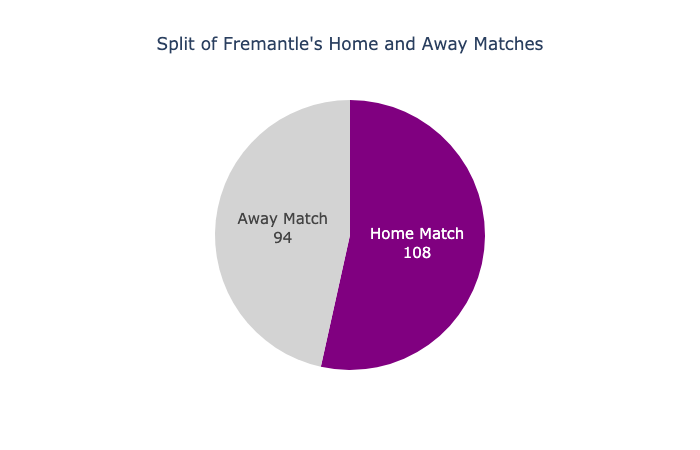

In [36]:
#home matches played
homegame = df_FRM[df_FRM['Home']==1]
#away matches played
awaygame = df_FRM[df_FRM['Home']==0]

vals = [len(homegame)/22, len(awaygame)/22]
labels = ['Home Match', 'Away Match']
cols = ['purple', 'lightgrey']

fig = go.Figure(data = [go.Pie(labels=labels, values=vals)])
fig.update_traces(hoverinfo='none', textfont_size=15, textinfo='label+value', 
                 marker=dict(colors=cols))
fig.update_layout(title="Split of Fremantle's Home and Away Matches", title_x=0.5,
                 showlegend=False)
fig.show('png')

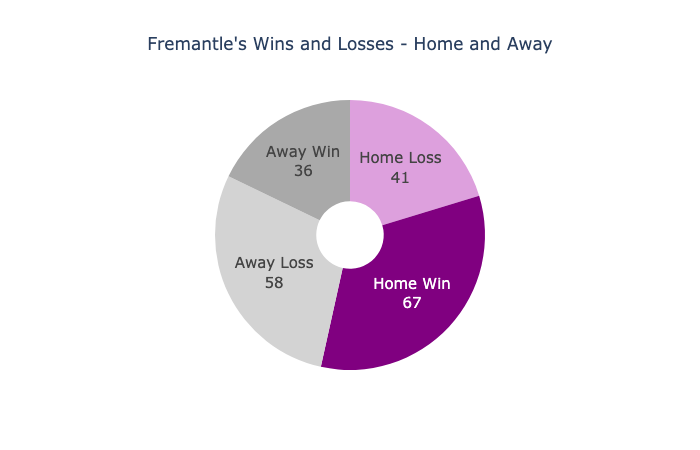

In [37]:
#separate home and away matches
homegame = df_FRM[df_FRM['Home']==1]
awaygame = df_FRM[df_FRM['Home']==0]
#find home wins and home losses
home_loss = homegame[df_FRM['WinLoss']==0]
home_win = homegame[df_FRM['WinLoss']==1]
#find away wins and away losses
away_loss = awaygame[df_FRM['WinLoss']==0]
away_win = awaygame[df_FRM['WinLoss']==1]

#remember to divide values by the number of players involved i.e. 22
vals = [len(home_loss)/22, len(home_win)/22, 
        len(away_loss)/22, len(away_win)/22]

labels = ['Home Loss', 'Home Win', 'Away Loss', 'Away Win']

cols = ['plum', 'purple', 'lightgrey', 'darkgrey']

fig = go.Figure(data = [go.Pie(labels=labels, values=vals, hole=0.25)]) 

fig.update_traces(hoverinfo='none', textfont_size=15, textinfo='label+value', direction='clockwise', 
                  sort=False, marker=dict(colors=cols))
fig.update_layout(title="Fremantle's Wins and Losses - Home and Away", title_x=0.5, 
                  showlegend=False)
fig.show('png')

It would appear that the home advantage factor holds true for Fremantle as they have won 31 more matches in their home stadium compared to when playing in their opposition's stadium. Given that Fremantle have not played an equal amount of home and away matches, lets consider how their wins and losses, both home and away, compare when considered as a percentages. 

In [38]:
print('Home Win %','','Home Loss %')
print("%.1f"%(((len(home_win)/22) / (len(homegame)/22))*100),
      '      ',  
      "%.1f"%(((len(home_loss)/22) / (len(homegame)/22))*100))

print('\n')

print('Away Win %','','Away Loss %')
print("%.1f"%(((len(away_win)/22) / (len(awaygame)/22))*100),
      '      ',
      "%.1f"%(((len(away_loss)/22) / (len(awaygame)/22))*100))

Home Win %  Home Loss %
62.0        38.0


Away Win %  Away Loss %
38.3        61.7


We can immediately see that although having played 14 more matches at home than away, Fremantle have almost the same percentage split for both matches won at home and lost away from home and matches lost at home and won away from home. It would seem that the Dockers win at home just as much as they lose away and lose at home just as much as they win away. 

As a result,we can infer that Fremnatle have an overall win percentage just over 50%. Lets confirm this.

In [39]:
FRM_wins = df_FRM.groupby('Date of Game')['WinLoss'].sum().div(22).sum()  
FRM_matches = df_FRM['Date of Game'].nunique()
print('FRM Overall Win Percentage')
print("%.1f"%((FRM_wins/FRM_matches)*100),'%')

FRM Overall Win Percentage
51.0 %


**ROUND BY ROUND**

We have seen how many wins and losses FRM have accumulated both at home and away. Lets now check how their performance holds on a round by round basis.

In [40]:
#Start off by checking how many rounds in an AFL season FRM have reached
df_FRM['Round'].unique()

array(['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11',
       'R12', 'R13', 'R15', 'R16', 'R17', 'R18', 'R19', 'R20', 'R21',
       'R22', 'R23', 'R14', 'QF', 'PF', 'SF', 'GF', 'EF'], dtype=object)

In [41]:
#Premiership season goes from R1 to R23 and then Finals series begins. 
#Hence, rounds are in order of R1 to R23 followed by QF, EF, SF, PF, GF
#QF = Qualifying Final, EF = Elimination Final, SF = Semi Final, PF = Preliminary Final, GF = Grand Final 


#as seen in array above, the rounds are not in order. To sort the values according to how they played in an
#AFL season, lets create a list so that we can select specific elements within that list.
roundslst = list(df_FRM['Round'].unique())

In [42]:
roundslst

['R1',
 'R2',
 'R3',
 'R4',
 'R5',
 'R6',
 'R7',
 'R8',
 'R9',
 'R10',
 'R11',
 'R12',
 'R13',
 'R15',
 'R16',
 'R17',
 'R18',
 'R19',
 'R20',
 'R21',
 'R22',
 'R23',
 'R14',
 'QF',
 'PF',
 'SF',
 'GF',
 'EF']

In [43]:
#Break up list and put it back together into the correct order
orderedlst= roundslst[:13] + roundslst[22:23]+ roundslst[13:22] + roundslst[-5:-4] + roundslst[-1:] + roundslst[-3:-2] + roundslst[-4:-3] + roundslst[-2:-1]

In [44]:
orderedlst

['R1',
 'R2',
 'R3',
 'R4',
 'R5',
 'R6',
 'R7',
 'R8',
 'R9',
 'R10',
 'R11',
 'R12',
 'R13',
 'R14',
 'R15',
 'R16',
 'R17',
 'R18',
 'R19',
 'R20',
 'R21',
 'R22',
 'R23',
 'QF',
 'EF',
 'SF',
 'PF',
 'GF']

In [45]:
#create new dataframe for the ordered list of rounds
roundsord = pd.DataFrame({'Round':orderedlst})

#create new dataframe for the amount of matches played and the amount of wins in each round from 2012 to 2020
FRM_roundwins = df_FRM.groupby('Round').agg({ 'Date of Game':'nunique', 
                                            'WinLoss': lambda x : sum(x)/22,}).rename(columns={'Date of Game':'Matches Played', 
                                                                                      'WinLoss':'Matches Won'})

In [46]:
#combine roundsord with FRM_roundwins to have a dataframe sorted by the order in which the rounds are played
#can achieve this by merging the two datframes on a column they have in common i.e. Round

FRM_rounds = roundsord.merge(FRM_roundwins, on='Round')

In [47]:
FRM_rounds

,Round,Matches Played,Matches Won
0,R1,9,5
1,R2,9,4
2,R3,9,5
3,R4,9,4
4,R5,9,6
5,R6,9,5
6,R7,9,5
7,R8,9,3
8,R9,9,5
9,R10,7,2


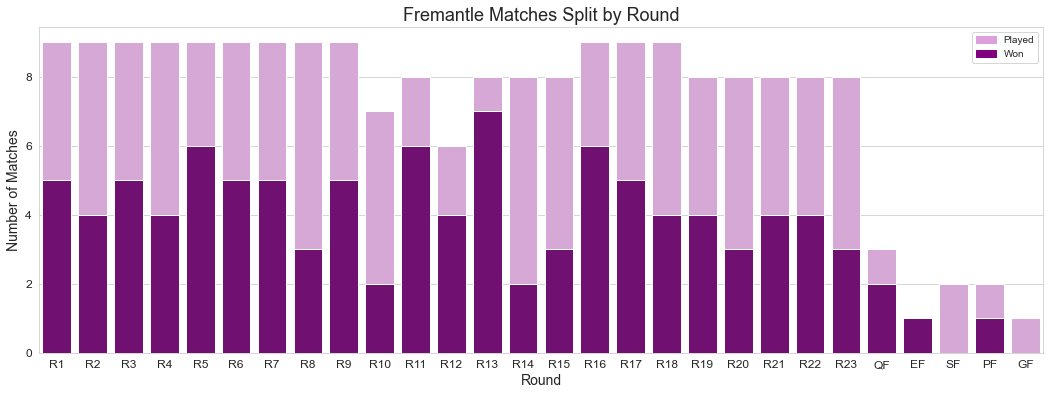

In [48]:
import matplotlib.patches as mpatches

plt.figure(figsize=(18,6))

played = sns.barplot(data=FRM_rounds, x='Round', y='Matches Played', color='plum')
wins = sns.barplot(data=FRM_rounds, x='Round', y='Matches Won', color='purple')

played = mpatches.Patch(color='plum', label='Played')
wins = mpatches.Patch(color='purple', label='Won')

plt.legend(handles=[played, wins])
plt.ylabel(ylabel='Number of Matches', fontsize=14)
plt.xlabel(xlabel = 'Round', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Fremantle Matches Split by Round', fontsize=18)
plt.show()

From the plot produced above, we can see that the Fremantle Dockers have reached the Grand Final only once and, unfortunately, have lost. They appear to have an almost even split in terms of wins and losses in their first 7 rounds, with form fluctuating a lot more from R8. Lets take a closer look and find the percentage of matches won overall in each round. 

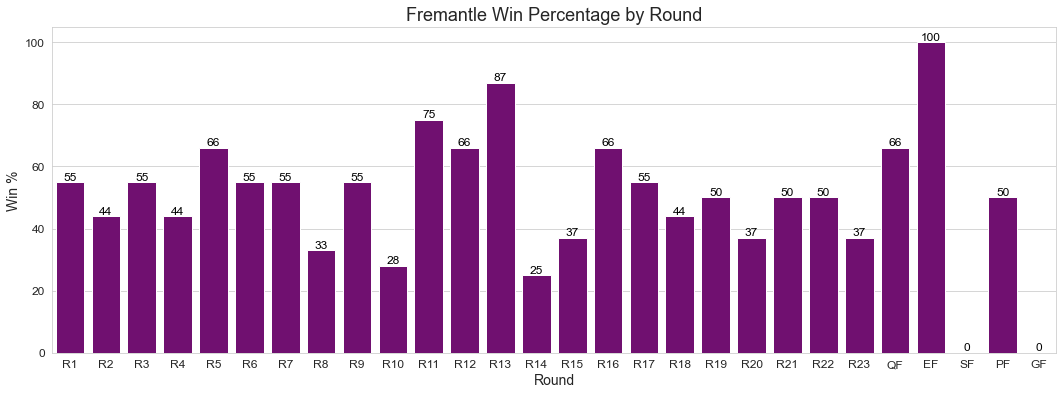

In [49]:
plt.figure(figsize=(18,6))

chart = sns.barplot(x= FRM_rounds['Round'].unique(), 
                    y=(FRM_rounds['Matches Won']/FRM_rounds['Matches Played']).mul(100).astype(int), 
                    color = 'purple')

for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0,5),
                 textcoords='offset points')

plt.title('Fremantle Win Percentage by Round', fontsize=18)
plt.xticks(rotation=0)
plt.xlabel('Round', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Win %', fontsize=14)
plt.yticks(fontsize=12)
plt.show()

In terms of the Premiership Season (Round 1 through to Round 23), Fremantle has won the greatest percentage of games in Round 13 (87%) and, interestingly, has lost the most in the following round, with a win percentage of only 25%. 

In the Finals Series, Fremantle boast a 100% record in the Elimination Final (EF), albeit making only 1 appearance, and have won 2 out of the 3 Qualifying Final (QF) matches they have played. Fremantle made it to the Preliminary Final (PF) on 2 occasions and in this particular round they have an even split between wins and losses. Following their PF win, they faced Hawthorn in the 2013 Grand Final but there would be no celebrations as they fell short of a first premiership title. 

**DAY BY DAY**

We have seen how the wins for Fremantle are split by round. Now lets look at how they are spread throughout the days of the week.

In [50]:
df_FRM.groupby('Day')['WinLoss'].sum().div(22)

Day
Fri     3.0
Mon     2.0
Sat    56.0
Sun    40.0
Thu     2.0
Wed     0.0
Name: WinLoss, dtype: float64

In [51]:
days = list(df_FRM['Day'].unique())

In [52]:
days

['Sat', 'Sun', 'Fri', 'Thu', 'Mon', 'Wed']

In [53]:
days_ord = days[4:5]+days[5:6]+days[3:4]+days[2:3]+days[0:1]+days[1:2]

In [54]:
days_ord

['Mon', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [55]:
days_ordered = pd.DataFrame({'Day':days_ord})

In [56]:
days_wins = df_FRM.groupby('Day').agg({'WinLoss':lambda x:sum(x)/22, 
                           'Date':'nunique'}).rename(columns={'WinLoss':'Matches Won', 
                                                             'Date': 'Matches Played'})

In [57]:
FRM_days = days_ordered.merge(days_wins, on='Day')

In [58]:
FRM_days

,Day,Matches Won,Matches Played
0,Mon,2,3
1,Wed,0,1
2,Thu,2,2
3,Fri,3,12
4,Sat,56,108
5,Sun,40,76


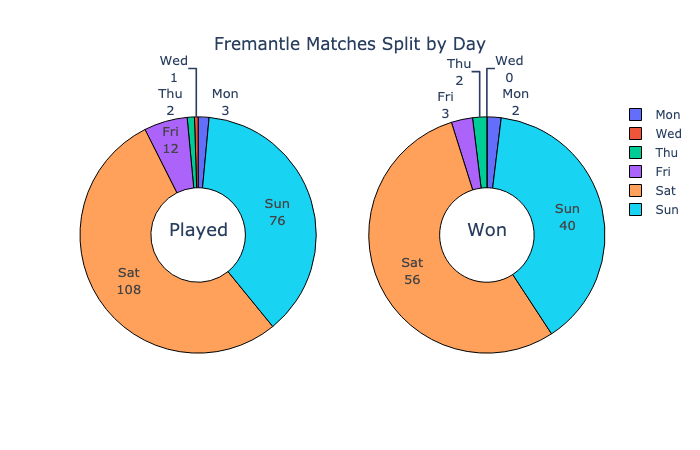

In [59]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], 
                   subplot_titles = ['Matches Played', 'Matches Won'])


fig.add_trace(go.Pie(labels=FRM_days['Day'], 
                               values=FRM_days['Matches Played'], 
                               sort=False,
                               textinfo = 'label+value', 
                               hoverinfo = 'none',
                               direction = 'counterclockwise',
                               textfont_size=13,
                               marker = dict(line=dict(color='black', width=1)), 
                               name = 'Matches Played'
                              ),1,1 
                       )

fig.add_trace(go.Pie(labels=FRM_days['Day'], 
                               values=FRM_days['Matches Won'], 
                               sort=False,
                               textinfo = 'label+value', 
                               hoverinfo = 'none',
                               direction='counterclockwise',
                               textfont_size=13,
                               marker = dict(line=dict(color='black', width=1)), 
                               name = 'Matches Won'
                              ),1,2 
                       )

fig.update_traces(hole=0.4, insidetextorientation='auto')
fig.update_layout(title = 'Fremantle Matches Split by Day', title_x=0.5, 
                  annotations=[dict(text='Played', x=0.225, y=0.475, font_size=18, showarrow=False),
                  dict(text='Won', x=0.775, y=0.475, font_size=18, showarrow=False)])
fig.show('png')

**FREMANTLE PERFORMANCE: GOALS**

We have explored how Fremantle's wins are spread. Lets now look at what bringa a win: scoring points via a goal (worth 6 points) or a behind (worth 1 point).  

Which of the two is scored is dependent on how the ball gets through the posts and which posts it goes through. For the definitions behind the terminology used you can use the AFL's official page: https://www.afl.com.au/news/144837/stats-glossary-every-stat-explained

Lets start by looking at the amount of goals scored by each AFL team and quickly compare that to Fremantle.

In [60]:
#Find the amount of goals scored for each team in each season 
df_afl_goals=pd.DataFrame(df_afl.groupby(['Team', 'Year'])['Goals'].sum())

In [61]:
df_afl_goals.reset_index(inplace=True)

In [62]:
df_afl_goals

,Team,Year,Goals
0,ADL,2012,388
1,ADL,2013,297
2,ADL,2014,315
3,ADL,2015,332
4,ADL,2016,396
...,...,...,...
157,WCE,2016,330
158,WCE,2017,309
159,WCE,2018,336
160,WCE,2019,309


In [63]:
df_afl_goals.set_index('Team')

,Year,Goals
Team,,
ADL,2012,388
ADL,2013,297
ADL,2014,315
ADL,2015,332
ADL,2016,396
...,...,...
WCE,2016,330
WCE,2017,309
WCE,2018,336


In [64]:
#Display total goals scored in descending order
df_afl_goals.groupby('Team')['Goals'].sum().sort_values(ascending=False)

Team
HTN    3008
GEE    2842
WCE    2784
ADL    2774
SYD    2749
RCH    2649
NML    2626
PDL    2545
COL    2543
GWS    2392
WBL    2345
ESS    2302
FRM    2292
BRS    2284
STK    2251
MLB    2183
CAR    2149
GCS    2036
Name: Goals, dtype: int64

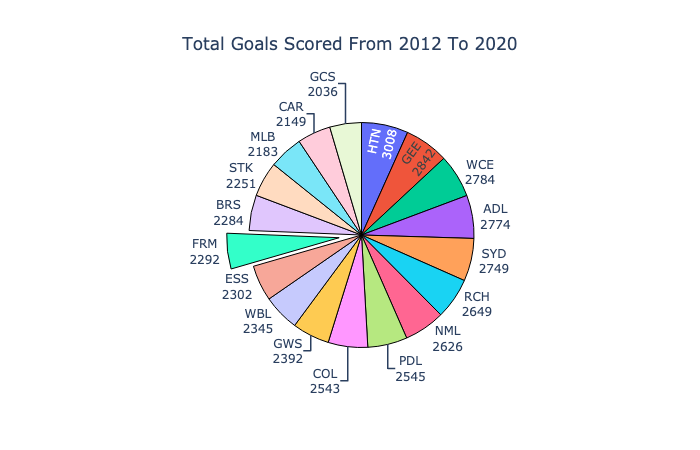

In [65]:
labels = df_afl_goals['Team'].unique()

vals = df_afl_goals.groupby('Team')['Goals'].sum()

fig = go.Figure(data = [go.Pie(labels=labels, 
                              values=vals, 
                              sort=True, 
                              textinfo = 'label+value', 
                              textfont_size = 12, 
                              hoverinfo = 'label+percent', 
                              direction = 'clockwise', 
                              marker = dict(line=dict(color='black', width=1)),
                              pull=[0, 0, 0, 0, 0, 0.2, 
                                    0, 0, 0, 0, 0, 0, 
                                    0, 0, 0, 0, 0, 0])])


fig.update_layout(title='Total Goals Scored From 2012 To 2020', title_x=0.5, showlegend=False)
fig.show('png')

Fremantle have scored a total of 2292 goals from the start of 2012 to the end of 2020. 
How is this total distributed over this 9 year peiod and how does it compare to other teams?

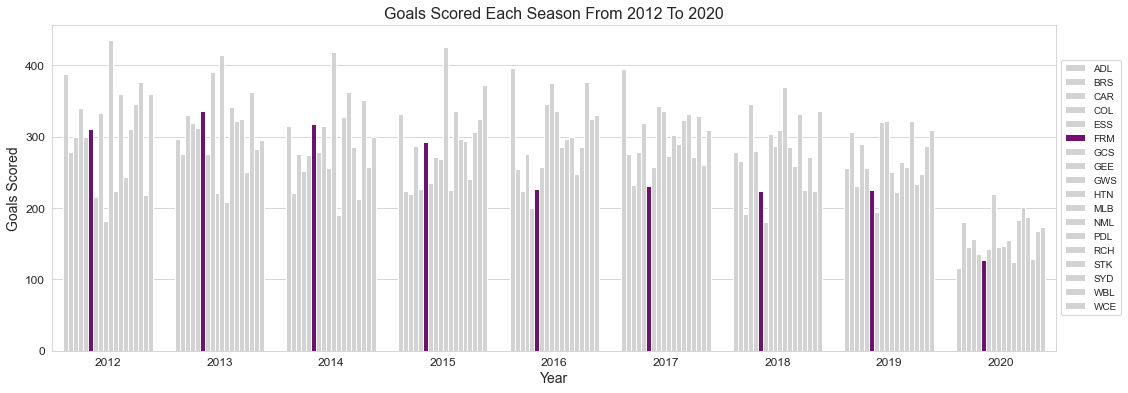

In [66]:
plt.figure(figsize = (18,6))

sns.barplot(data = df_afl_goals, x = 'Year', y = 'Goals', hue = 'Team', 
           palette = {'ADL': 'lightgrey', 
                            'PDL' : 'lightgrey', 
                            'CAR' : 'lightgrey', 
                            'COL' : 'lightgrey', 
                            'RCH' : 'lightgrey',
                            'BRS' : 'lightgrey', 
                            'WBL' : 'lightgrey',
                            'GCS' : 'lightgrey', 
                            'MLB' : 'lightgrey',
                            'GEE' : 'lightgrey', 
                            'FRM' : 'purple', 
                            'HTN' : 'lightgrey', 
                            'SYD' : 'lightgrey', 
                            'STK' : 'lightgrey',
                            'GWS' : 'lightgrey', 
                            'NML' : 'lightgrey', 
                            'ESS' : 'lightgrey',
                            'WCE' : 'lightgrey' })


plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Goals Scored', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Goals Scored Each Season From 2012 To 2020', fontsize=16)
plt.show()

We can transfrom the barplot above into a heatmap to better visualise the amount of goals scored by each team from 2012 to 2020. Doing so will also give us the opportunity to more readily compare Fremantle's total to that achieved by their opponents. 

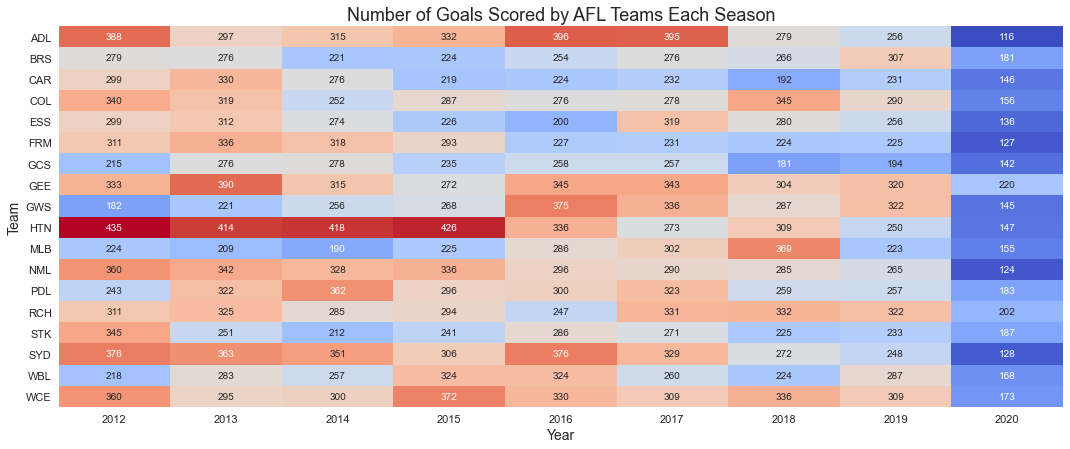

In [67]:
plt.figure(figsize=(18,7))

sns.heatmap(data=df_afl.groupby(['Team', 'Year'])['Goals'].sum().astype(int).unstack(), 
            cmap='coolwarm', cbar=False, annot=True, fmt='.3g')

plt.title('Number of Goals Scored by AFL Teams Each Season', fontsize=18)
plt.ylabel(ylabel='Team', fontsize=14)
plt.yticks(fontsize=11)
plt.xlabel(xlabel='Year', fontsize=14)
plt.xticks(fontsize=11)
plt.show()

The heatmap above displays the total number of goals scored by the AFL teams each year. The color scheme used varies between blue and red, with blue indicating lower values and red higher ones. Focusing on Fremantle, we can see that until 2015 they were scoring a high amount of goals, placing them among the highest ranked teams for goals scored. However, from 2016 onwards we can see that they have been scoring considerably less goals with their best total between 2016 and 2020 trailing their pre 2016 total by more than 100 goals. 

2020 was a low scoring year for all teams. This is a result of every team playing fewer games compared to previous seasons due to a partial stop in the season that took place in response to the outbreak of Coronavirus around Australia and, of course, the world. 

**FREMANTLE PERFORMANCE: GOALS AND BEHINDS**

We have looked at the number of goals scored by each team. Lets now turn our attention to how many behinds each team has scored and how this compares to the amount of goals scored. 

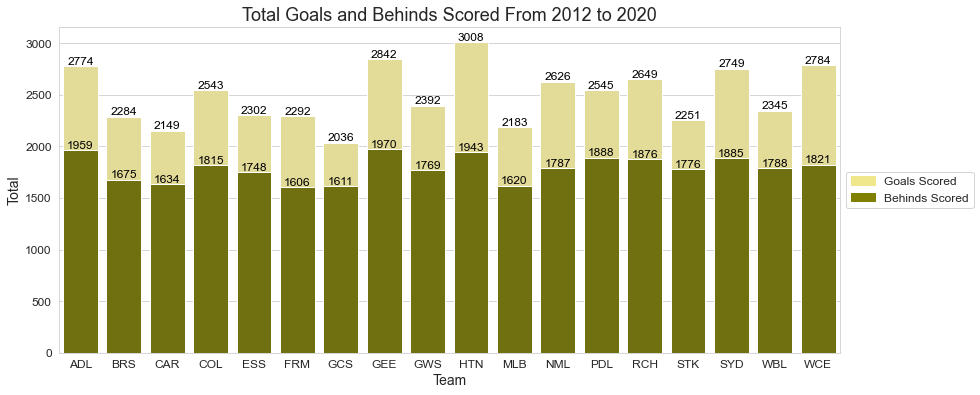

In [68]:
plt.figure(figsize=(14,6))

goals=sns.barplot(x = df_afl_goals['Team'].unique(), 
                  y = df_afl_goals.groupby('Team')['Goals'].sum(), color='khaki')
behinds=sns.barplot(x = df_afl_goals['Team'].unique(), 
                    y = df_afl.groupby('Team')['Behinds'].sum(), color='olive')

for p in goals.patches:
             goals.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0,5),
                 textcoords='offset points')

goals= mpatches.Patch(color='khaki', label='Goals Scored')
behinds = mpatches.Patch(color='olive', label='Behinds Scored')

plt.title('Total Goals and Behinds Scored From 2012 to 2020', fontsize=18)
plt.legend(handles=[goals, behinds], loc = 'center left', bbox_to_anchor = (1.0, 0.5), fontsize=12)
plt.xlabel(xlabel='Team', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel(ylabel='Total', fontsize=14)
plt.yticks(fontsize=12)

plt.show()

From the simple barplot we can immediately see that Fremantle have scored the fewest amount of behinds and rank 13th for goals scored. Lets see against what teams Fremantle have scored their goals and behinds.

In [69]:
FRM_gls = pd.DataFrame(df_FRM.groupby('Opposition')['Goals'].sum())
FRM_gls.reset_index(inplace=True)

In [70]:
FRM_bds = pd.DataFrame(df_FRM.groupby('Opposition')['Behinds'].sum())
FRM_bds.reset_index(inplace=True)

In [71]:
FRM_glsbds = FRM_gls.merge(FRM_bds, on='Opposition')

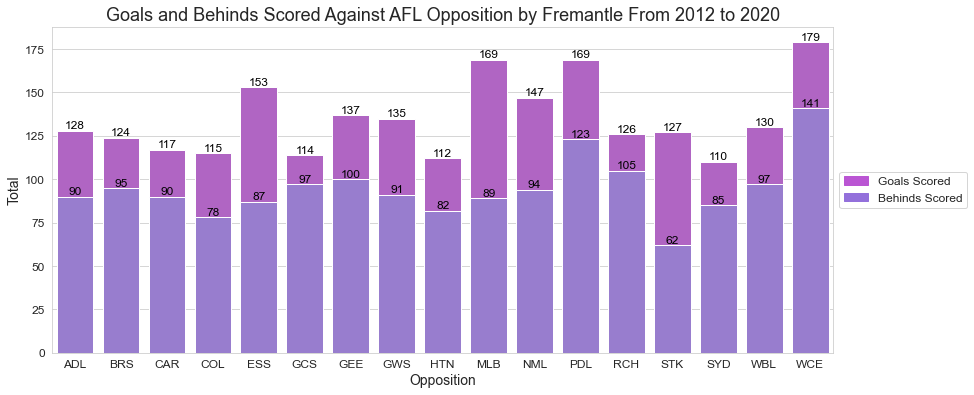

In [72]:
plt.figure(figsize=(14,6))

g=sns.barplot(data=FRM_glsbds, x = 'Opposition', y = 'Goals', color='mediumorchid')
b=sns.barplot(data=FRM_glsbds, x = 'Opposition', y = 'Behinds', color='mediumpurple')

for p in g.patches:
             g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0,5),
                 textcoords='offset points')

g= mpatches.Patch(color='mediumorchid', label='Goals Scored')
b= mpatches.Patch(color='mediumpurple', label='Behinds Scored')

plt.title('Goals and Behinds Scored Against AFL Opposition by Fremantle From 2012 to 2020', fontsize=18)
plt.legend(handles=[g, b], loc = 'center left', bbox_to_anchor = (1.0, 0.5), fontsize=12)
plt.xlabel(xlabel='Opposition', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel(ylabel='Total', fontsize=14)
plt.yticks(fontsize=12)

plt.show()

Here we have the split of total goals and behinds scored by the Dockers against their opposition. From this, we can obtain the total score that Fremantle have reached by giving the amount of goals and behinds their appropriate values. 

In [73]:
#create loop to calculate total score accumulated against each team

#for each team faced by Fremantle
for team in FRM_glsbds['Opposition'].unique():
    i = 0
    #start at team indexed 0, go on until index 16 (17 opposition teams)
    while i < len(FRM_glsbds['Opposition'].unique()):
        #for each opponent, find total amount of goals and multiply by 6 as goal = 6 points 
        g = (FRM_glsbds[FRM_glsbds['Opposition']==team]['Goals'].sum())*6
        #for each opponent, find total amount of behinds
        b = FRM_glsbds[FRM_glsbds['Opposition']==team]['Behinds'].sum()
        #sum value of goals and behinds
        total = g + b
        #move onto next index i.e. team
        i+=1
    #return the team and the total score     
    print(team, total)

ADL 858
BRS 839
CAR 792
COL 768
ESS 1005
GCS 781
GEE 922
GWS 901
HTN 754
MLB 1103
NML 976
PDL 1137
RCH 861
STK 824
SYD 745
WBL 877
WCE 1215


In [74]:
#Put data from loop into a dataframe to then join with the original dataframe

scores = {'Opposition': ['ADL', 'BRS', 'CAR', 'COL', 'ESS', 'GCS', 
                         'GEE', 'GWS', 'HTN', 'MLB','NML', 'PDL', 
                         'RCH', 'STK', 'SYD', 'WBL','WCE'], 
          'Total Score':[858, 839, 792, 768, 1005, 781, 
                         922, 901, 754, 1103, 976, 1137, 
                         861, 824, 745, 877, 1215]}

df_scores = pd.DataFrame(data=scores)

In [75]:
df_scores.sort_values('Total Score',ascending=False)

,Opposition,Total Score
16,WCE,1215
11,PDL,1137
9,MLB,1103
4,ESS,1005
10,NML,976
6,GEE,922
7,GWS,901
15,WBL,877
12,RCH,861
0,ADL,858


As is shown in the table above, Fremantle have managed to total their largest overall score against their local rivals WCE (West Coast Eagles). This total, however, was achieved by playing a total of 17  matches - 2 more compared to their second most faced and scored against opposition in PDL (Port Adelaide). 

Fremantle seem to have struggled to affect the scoreboard the most against SYD (Sydney), with the Dockers being kept to a total score of 745 in 12 matches. Despite being a low scoring match on average, Fremantle have won 42% of matches against SYD (5 wins out of 12 games). This is a much more positive outcome compared to the win percentage held against WCE; a mere 37% with 6 wins out of 17 matches played although reaching a total score greater to that against SYD by 470 points. 

**CONVERTING CHANCES INTO POINTS**

Clearly the amount of goals and behinds a team makes depends on how good a kicking opportunity they can create. It is very uncommon for a team to score, defined here as converting a goal or a behind, from a distance greater than the 50 meter mark. As a result, can measure how effectively a team has converted their chances. I'll call this the Conversion Percentage. To do so, we can divide the amount of goals and behinds by the amount of Inside 50s - the act of running or passing the ball inside the 50m arc - each team has tallied. As the team in focus is Fremantle, lets begin with seeing what percentage of their inside 50s they have turned into points.

Obviously there is a limit to how effective our new variable is. Mearly entering the 50m arc does necessarily mean you are able to have a shot on goal, there is still a long way to go! Players may chose to pass the ball to a teammate that finds themselves in a more favourable position. However, the data only tells us how many times the ball crosses into the 50m arc and how many goals were scored. We cannot analyse the passes themselves as we have no way of knowing which of those were passes that moved the footy closer to the posts, we only have the amount of passes completed. As such, we will assume that a completed pass into the opposition's 50m arc presents them with a scoring opportunity.

In [76]:
#Gather relevant columns and information to create new dataframe
FRM_stats = df_FRM.groupby('Opposition').agg({'Date of Game':'nunique', 
                                  'WinLoss':lambda x:sum(x)/22,
                                  'Inside 50s':'sum',
                                 'Goals':'sum', 
                                 'Behinds':'sum'}).rename(columns={'Date of Game':'Matches Played', 
                                                                  'WinLoss':'Matches Won'})

In [77]:
#Merge new datframe with the dataframe showing total score achieved
FRM_stats = FRM_stats.merge(df_scores, on='Opposition')

In [78]:
#Find conversion percentage
((FRM_stats.groupby('Opposition')['Goals'].sum()+FRM_stats.groupby('Opposition')['Behinds'].sum())/FRM_stats.groupby('Opposition')['Inside 50s'].sum()).round(3)

Opposition
ADL    0.363
BRS    0.420
CAR    0.409
COL    0.438
ESS    0.404
GCS    0.423
GEE    0.408
GWS    0.448
HTN    0.380
MLB    0.416
NML    0.424
PDL    0.430
RCH    0.402
STK    0.365
SYD    0.343
WBL    0.434
WCE    0.402
dtype: float64

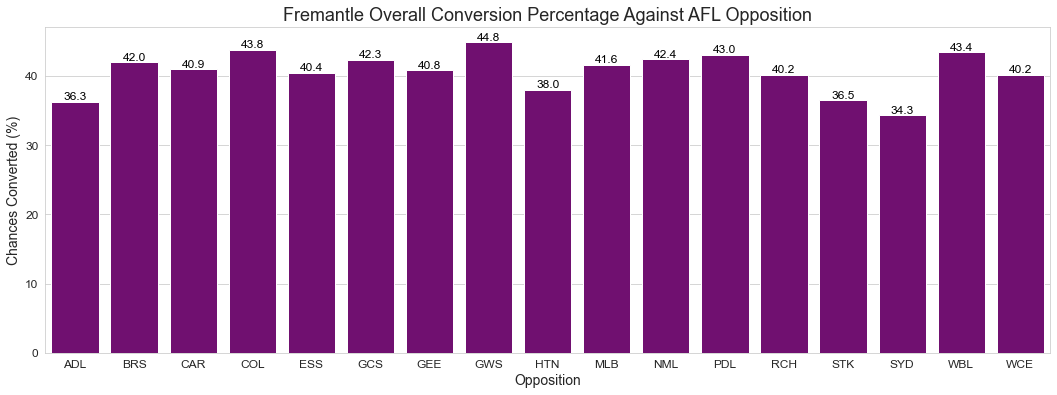

In [79]:
#Plot conversion percentage

plt.figure(figsize=(18,6))

conv_perc = sns.barplot(x=FRM_stats['Opposition'].unique(), 
            y=(((FRM_stats.groupby('Opposition')['Goals'].sum()+FRM_stats.groupby('Opposition')['Behinds'].sum())/FRM_stats.groupby('Opposition')['Inside 50s'].sum()))*100,
            color='purple')

for p in conv_perc.patches:
             conv_perc.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0,5),
                 textcoords='offset points')
        
plt.title('Fremantle Overall Conversion Percentage Against AFL Opposition', fontsize=18)
#plt.legend(handles=[g, b], loc = 'center left', bbox_to_anchor = (1.0, 0.5), fontsize=12)
plt.xlabel(xlabel='Opposition', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel(ylabel='Chances Converted (%)', fontsize=14)
plt.yticks(fontsize=12)
plt.show()

From our newly created variable, we notice that although totalling their highest score against WCE, Fremantle have converted just 40.2% of the chances created within the 50m arc. This is the same percentage as that against Richmond (RCH), where they have scored 53 goals and 36 behinds less compared to those recorded against WCE and accumulated a total of 861 compared to the 1215 against WCE. As a result, we can see that Fremantle could have accumulated a larger score total over the last 9 seasons against their local rivals.

While the conversion percentage against WCE shows a lot of missed opportunities, given that FRM reached such a high total with a considerably low conversion of times they were inside the 50m arc, that against SYD does not paint a prettier picture. Against SYD, Fremantle have only managed to score 110 goals and 85 behinds, thus reaching a total of 745 points, and have been inside SYD's 50m arc 569 times - that is more than 200 times less than the number of times inside WCE's 50m arc. This starc difference exposes SYD to be one of the hardest opposition for Fremantle in terms of both progressing the ball into the 50m arc converting a kick. 

In [80]:
FRM_stats = FRM_stats.assign(Conv=[0.363,0.420,0.409,0.438,0.404,0.423,
                                            0.408,0.448,0.380,0.416,0.424,0.430,
                                            0.402,0.365,0.343,0.434,0.402])

In [81]:
FRM_stats.rename(columns={'Conv':'Conversion Percentage'}, inplace=True)

In [82]:
FRM_stats.groupby('Opposition').agg({'Goals':'sum', 
                                     'Behinds':'sum', 
                                     'Inside 50s':'sum', 
                                     'Conversion Percentage':'sum'}).sort_values('Inside 50s', ascending=True)

,Goals,Behinds,Inside 50s,Conversion Percentage
Opposition,,,,
COL,115,78,441,0.438
GCS,114,97,499,0.423
GWS,135,91,504,0.448
CAR,117,90,506,0.409
HTN,112,82,511,0.380
STK,127,62,518,0.365
BRS,124,95,522,0.420
WBL,130,97,523,0.434
SYD,110,85,569,0.343


**SCORING AGAINST FREMANTLE**

We have seen how Fremantle performs against its opponents. What about the reserve? How do teams perform against Fremantle? 


In [83]:
#Lets start by creating a new dataframe specific for when AFL teams face Fremantle i.e. Opposition = FRM
df_FRM_Opps = df_afl[(df_afl['Opposition']=='FRM')]

In [84]:
#create loop to calculate total score by each team when facing FRM

for opp in df_FRM_Opps['Team'].unique():
    i = 0
    
    while i < len(df_FRM_Opps['Team'].unique()):
        opp_g = (df_FRM_Opps[df_FRM_Opps['Team']==opp]['Goals'].sum())*6
        opp_b = df_FRM_Opps[df_FRM_Opps['Team']==opp]['Behinds'].sum()
        opp_tot = opp_g + opp_b
        
        i+=1

    print(opp, opp_tot)

ADL 1034
CAR 622
COL 793
BRS 632
WBL 788
GCS 701
MLB 729
GEE 1044
HTN 1166
SYD 983
STK 873
GWS 759
NML 745
ESS 904
RCH 1111
PDL 1242
WCE 1452


In [85]:
opps_scores = {'Team': ['ADL', 'CAR', 'COL', 'BRS', 'WBL', 'GCS', 
                         'MLB', 'GEE', 'HTN', 'SYD','STK', 'GWS', 
                         'NML', 'ESS', 'RCH', 'PDL','WCE'], 
               
          'Total Score':[1034,622,793,632,788,701,
                         729,1044,1166,983,873,759,
                         745,904,1111,1242,1452]}

df_opps_scores = pd.DataFrame(data=opps_scores)

In [86]:
FRM_Opps_stats = df_FRM_Opps.groupby('Team').agg({'WinLoss':lambda x:sum(x)/22,
                                                  'Inside 50s':'sum',
                                                  'Goals':'sum', 
                                                  'Behinds':'sum'}).rename(columns={'WinLoss':'Matches Won'})

In [87]:
FRM_Opps_stats = FRM_Opps_stats.merge(df_opps_scores, on='Team')

In [88]:
((FRM_Opps_stats.groupby('Team')['Goals'].sum()+FRM_Opps_stats.groupby('Team')['Behinds'].sum())/FRM_Opps_stats.groupby('Team')['Inside 50s'].sum()).round(3)

Team
ADL    0.418
BRS    0.407
CAR    0.395
COL    0.385
ESS    0.425
GCS    0.364
GEE    0.413
GWS    0.478
HTN    0.468
MLB    0.388
NML    0.367
PDL    0.424
RCH    0.433
STK    0.426
SYD    0.411
WBL    0.399
WCE    0.456
dtype: float64

In [89]:
FRM_Opps_stats = FRM_Opps_stats.assign(Conv=[0.418,0.407,0.395,0.385,0.425,0.364,
                                             0.413,0.478,0.468,0.388,0.367,0.424,
                                             0.433,0.426,0.411,0.399,0.456])

FRM_Opps_stats.rename(columns={'Conv':'Conversion Percentage'}, inplace=True)

In [90]:
FRM_Opps_stats.rename(columns = {'Team':'Opposition', 
                                'Matches Won':'Matches Lost', 
                                'Inside 50s':'Inside 50s Conceded', 
                                'Goals':'Goals Conceded', 
                                'Behinds':'Behinds Conceded', 
                                'Total Score':'Total Score Against', 
                                'Conversion Percentage':'Conversion Percentage Against'}, inplace=True)

In [91]:
FRM_Opps_stats

,Opposition,Matches Lost,Inside 50s Conceded,Goals Conceded,Behinds Conceded,Total Score Against,Conversion Percentage Against
0,ADL,7,679,150,134,1034,0.418
1,BRS,3,398,94,68,632,0.407
2,CAR,4,435,90,82,622,0.395
3,COL,5,527,118,85,793,0.385
4,ESS,7,563,133,106,904,0.425
5,GCS,4,483,105,71,701,0.364
6,GEE,7,664,154,120,1044,0.413
7,GWS,5,427,111,93,759,0.478
8,HTN,10,601,177,104,1166,0.468
9,MLB,3,551,103,111,729,0.388


In [92]:
FRM_fullstats = FRM_stats.merge(FRM_Opps_stats, on='Opposition')

In [93]:
FRM_fullstats

,Opposition,Matches Played,Matches Won,Inside 50s,Goals,Behinds,Total Score,Conversion Percentage,Matches Lost,Inside 50s Conceded,Goals Conceded,Behinds Conceded,Total Score Against,Conversion Percentage Against
0,ADL,13,6,601,128,90,858,0.363,7,679,150,134,1034,0.418
1,BRS,10,7,522,124,95,839,0.420,3,398,94,68,632,0.407
2,CAR,10,6,506,117,90,792,0.409,4,435,90,82,622,0.395
3,COL,10,5,441,115,78,768,0.438,5,527,118,85,793,0.385
4,ESS,12,5,594,153,87,1005,0.404,7,563,133,106,904,0.425
5,GCS,10,6,499,114,97,781,0.423,4,483,105,71,701,0.364
6,GEE,13,6,581,137,100,922,0.408,7,664,154,120,1044,0.413
7,GWS,10,5,504,135,91,901,0.448,5,427,111,93,759,0.478
8,HTN,12,2,511,112,82,754,0.380,10,601,177,104,1166,0.468
9,MLB,12,9,620,169,89,1103,0.416,3,551,103,111,729,0.388


Above we have a dataframe detailing the performance by Fremantle when facing its AFL opponents. The table is divised so that columns with 'conceded' or 'against' in their name indicate that how that AFL team has performed against Fremantle. All others indicate Fremantle's performance against that specific oppenent. 

Lets take a look at how many of the chances created against Fremantle each team has converted into points. 

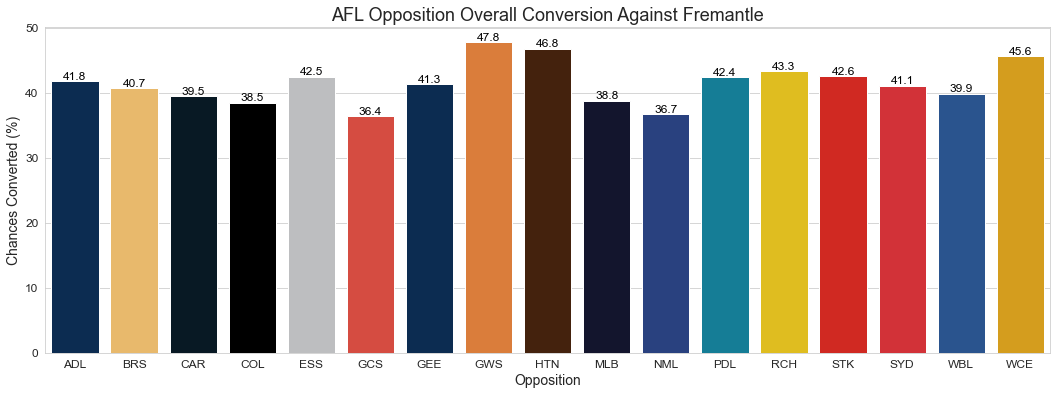

In [94]:
plt.figure(figsize=(18,6))

conv_perc_ag = sns.barplot(x=FRM_fullstats['Opposition'].unique(), 
                           y=FRM_fullstats.groupby('Opposition')['Conversion Percentage Against'].sum()*100, 
                           palette = {'ADL': '#002b5c', 
                                'PDL' : '#008aab', 
                                'CAR' : '#031a29', 
                                'COL' : '#000000', 
                                'RCH' : '#ffd200',
                                'BRS' : '#fdbe57', 
                                'WBL' : '#1a529e',
                                'GCS' : '#ee3728', 
                                'MLB' : '#0f1131',
                                'GEE' : '#002b5c', 
                                'HTN' : '#4d2004', 
                                'SYD' : '#ed171f', 
                                'STK' : '#ed0f05',
                                'GWS' : '#f47920', 
                                'NML' : '#1a3b8e', 
                                'ESS' : '#bdbec0',
                                'WCE' : '#f2a900',})

for p in conv_perc_ag.patches:
             conv_perc_ag.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0,5),
                 textcoords='offset points')
        
plt.title('AFL Opposition Overall Conversion Against Fremantle', fontsize=18)
#plt.legend(handles=[g, b], loc = 'center left', bbox_to_anchor = (1.0, 0.5), fontsize=12)
plt.xlabel(xlabel='Opposition', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel(ylabel='Chances Converted (%)', fontsize=14)
plt.yticks(fontsize=12)
plt.show()

Interestingly, the team which has converted entry into the 50m arc into points, whether that be a goal or a behind, most effecitently is GWS (Greater Western Sydney) with almost 50% of Inside 50s resulting into points on the board. 

I say this is interesting as, from FRM_fullstats, we can see that Fremantle have conceded only 427 inside 50s against GWS, their second lowest total. This is completely different compared to the case of HTN and WCE as they hold a conversion percentage of 46.8% and 45.6% respectively, having each penetrated Fremantle's 50m arc a total of 601 and 826 times. 

In the case of GWS, it might be that they are more prolific against Fremantle compared to other teams. If we were to analyse the amount of goals and behinds scored given the amount of times they have an entered a different opponent's 50m arc, it is possible we might find a significantly lower conversion percentage. GWS seem to be a team, against Fremantle that is, that does not make many mistakes to improve the scoreboard when given the opportunity. HTN and WCE appear to make it inside Fremantle's 50m arc a lot more often but have been slightly less efficient at making those opportunities count. 

**FREMANTLE SCORE MARGIN**

After 9 seasons, what teams has Fremantle managed to outscore? 

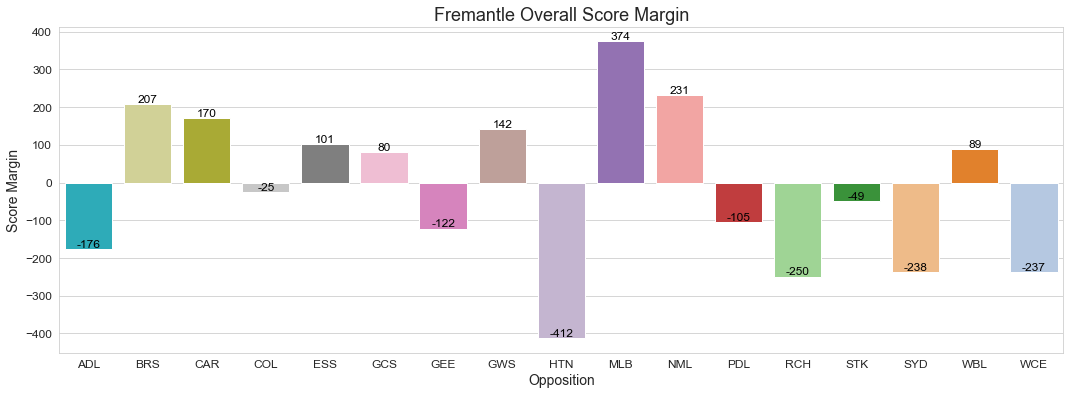

In [95]:
plt.figure(figsize=(18,6))

chart = sns.barplot(data = FRM_fullstats, x = 'Opposition', 
           y = ((FRM_fullstats['Total Score'])-(FRM_fullstats['Total Score Against'])), 
           palette = 'tab20_r')

for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0,5),
                 textcoords='offset points')

plt.title('Fremantle Overall Score Margin', fontsize=18)
plt.ylabel(ylabel='Score Margin', fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel(xlabel='Opposition', fontsize=14)
plt.xticks(fontsize=12)
plt.show()

Over a time period spanning 9 seasons, Fremantle has accumulated a positive score margin against 8 teams. Their best result sees them outscoring MLB by a total of 374 points by the end of the the 2020 seson. After the same timespan, however, Fremantle are left trailing HTN (Hawthorn) by a total of 412 points. Moreover, they end the 2020 season having a negative score margin against a total of 9 teams. 

It is important to note that a negative overall score margin doesn't necessarily mean that Fremantle hold a negative record (more losses than wins) against that specific opposition. A prime example of this is STK. As shown, Fremantle have an overall score margin of -49, indicating that they have conceded more points against STK than they have managed to score. However, using FRM_fullstats, we can see that out of the total matches played between the two teams, Fremantle have accumulated more wins (6 compared to STK's 5). The same is true for the matches played against PDL. Fremantle have an overall score margin of -105 but have won 8 times out of the 15 they have faced PDL. 

Of course, the same logic can be applied in the opposite sense. That is to say that a positive score margin does not always indicate a positive (more wins than losses) overall record against a specific opposition. For example, we see that Fremantle have a total score margin of 101 against ESS (Essendon). Nevertheless, when looking at the results of the matches played, we find that Fremantle, although outscoring their opponents from  northern Melbourne overall, have lost 2 more times than they have won; leaving them with a record of 5W-7L.   

These exeptions are obviously harder to find once the score margin grows too large in either direction. It is very difficult to hold a positive record against a team that has outscored you by a total of 412 points. It would mean losing a few games by quite literally an extraordinary amount of points, probably in the 100s, and winning others by a very small margin. Likewise, it is very unlikely to hold a negative record against a team that has been outscored by 374 points. Such a scenario implies losing by very fine margins most of the time and winning a few games by a considerably large margins. 

Taking from Fremantle's overall score margin against HTN and MLB, we see that they have been outscored by HTN by 412 points and hold an overall record of 2W-10L whereas they have outscored MLB by 374 points and hold an overall record of 9W-3L. 

**MATCH BY MATCH MARGIN**

Lets take a closer look at Fremantle's score margin. We can do this by taking the data on a match by match basis rather than looking at the final, overall picture. To do so, we can use the 'Margin' column directly provided in the data. However, to make things easier when plotting, we need to manipulate the 'Date of Game' column.

In [96]:
#Check what type of data 'Date of Game' holds
df_FRM['Date of Game'].dtype

dtype('<M8[ns]')

In [97]:
#Only want month and day value so to stack data when plotting season by season
df_FRM[df_FRM['Year']==2014].sort_values('Date of Game')['Date of Game'].dt.strftime('%d-%b').unique()

array(['14-Mar', '29-Mar', '04-Apr', '13-Apr', '19-Apr', '25-Apr',
       '04-May', '10-May', '17-May', '01-Jun', '08-Jun', '14-Jun',
       '21-Jun', '28-Jun', '05-Jul', '13-Jul', '19-Jul', '31-Jul',
       '09-Aug', '17-Aug', '24-Aug', '30-Aug', '06-Sep', '13-Sep'],
      dtype=object)

In [98]:
#Create new dataframe grouping by 'Year' and 'Day and Month of Game' 
#Find sum of margin for each subgroup
agg_FRM = df_FRM.groupby(['Year','Date of Game'], as_index=False).agg({'Margin':'sum'})

In [99]:
#Divide margin by 22 as each match has 22 FRM players
agg_FRM['Margin'] = agg_FRM['Margin'].div(22)

In [100]:
#Replace year with 2000 in order to standardise data
agg_FRM['Standard-Date'] = agg_FRM['Date of Game'].apply(lambda x: x.replace(2000))

In [101]:
#Check to see if new column is there and holds the data in the format we want 
agg_FRM

,Year,Date of Game,Margin,Standard-Date
0,2012,2012-03-31,4.0,2000-03-31
1,2012,2012-04-07,-13.0,2000-04-07
2,2012,2012-04-14,29.0,2000-04-14
3,2012,2012-04-20,13.0,2000-04-20
4,2012,2012-04-27,-8.0,2000-04-27
...,...,...,...,...
197,2020,2020-08-29,-38.0,2000-08-29
198,2020,2020-09-02,-27.0,2000-09-02
199,2020,2020-09-07,14.0,2000-09-07
200,2020,2020-09-12,64.0,2000-09-12


In [102]:
#create new column that holds day and month from value of 'Date of Game' as a string
#For example, if date is '2012-03-31', we want to transform that to 31-Mar 
agg_FRM['date_string'] = agg_FRM['Date of Game'].dt.strftime('%d-%b')

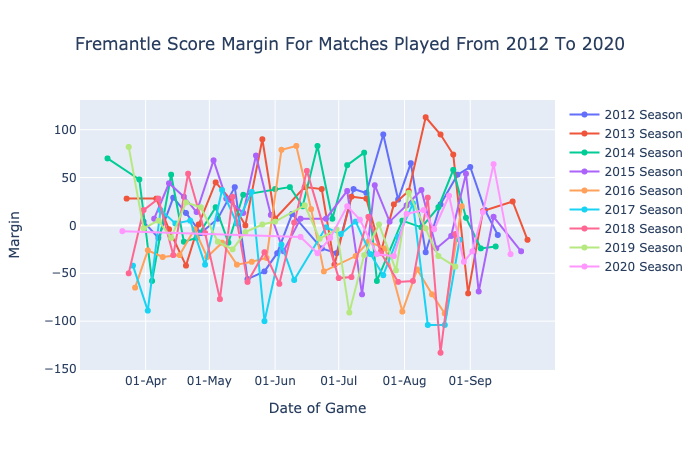

In [103]:
fig = go.Figure()

for year in agg_FRM['Year'].unique():
    #plot score margin of each match for every year (2012-2020)
    fig.add_trace(go.Scatter( 
                 x = agg_FRM[agg_FRM['Year']==year]['Standard-Date'], 
                 y = agg_FRM[agg_FRM['Year']==year]['Margin'], 
                 line=dict(width=2), name = f'{year} Season'))

#Amend xlabel so day and month are shown (i.e. 01-Apr), not month and year
months = []
for m in range(min(agg_FRM['Standard-Date']).month,max(agg_FRM['Standard-Date']).month+1):
    months.append(date(2000,m,1))

month_labels = [x.strftime('%d-%b') for x in months]
    
fig.update_xaxes(ticktext=month_labels, tickvals=months)

fig.update_traces(mode='lines+markers')
fig.update_layout(title = 'Fremantle Score Margin For Matches Played From 2012 To 2020', 
                  title_x = 0.5,
                 xaxis_title = 'Date of Game', 
                 yaxis_title = 'Margin')

fig.show('png')

Displayed above are the score margins for every match played by Fremantle from the start of the 2012 season on 31st March, all the way to the final match played in the 2020 season on 20th September. Although quite messy, this plot shows what the score margin was at the end of each match and, therefore, whether a match was won, lost or drawn (a single instance of a draw can be found on May 18, 2013). 

The interactive nature of Plotly makes it a lot easier to filter through each season and even compare two or more seasons. This can be achieved by clicking the labels in the legend to select and deselect seasons of interest. 

From the data exploration performed, we can see that the Fremantle Dockers appear to currently be a side in what may be considered a rebuilding phase. They have enjoyed some success in the past, although not yet managing to win a Premiership, and started facing some trouble in 2016 where they won only 18% of their matches. From then on they have steadily managed to improve their win percentage to 41%. Ranking only 13th overall for goals scored and dead last for behinds scored overall, where overall is related to the time period covered by the data and not all-time, it is crucial they begin to both create and convert more scoring opportunities. 

**THANK YOU**

Thank you for taking the time to read the notebook. I hope you have found it interesting and somewhat helpful. Please do leave a comment if you have any questions and upvote it if you have enjoyed it. 